In [4]:
"""
Лабораторная работа 2.
Провести полноценный анализ данных из датасета выбранного в лабе 1. (Посмотреть какого типа колонки, чтобы понять,
могут ли они относится к категориальным признакам, провести статистический анализ колонок, построить сводные таблицы
категориальных данных, проанализировать нормализованные данные, чтобы понять процентное отношения записей
по выбранному признаку).
Сделать выборки с помощью loc и iloc, построить графики.
"""
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
# Загружаем датасет
"""
О датасете:
Этот набор данных содержит подробный обзор успеваемости учащихся в различных школах с акцентом на академические
достижения и демографические факторы. Он содержит важную информацию, такую как идентификационные данные учащихся, пол,
возраст, уровень успеваемости и оценки по ключевым предметам, таким как математика, чтение и письмо. Кроме того, в нем
собраны данные о посещаемости, позволяющие понять, как присутствие в школе коррелирует с успехами в учебе.
"""
data = pd.read_csv("student_performance_data.csv")

In [6]:
# Основная информация
data.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [8]:
print(data.columns)
print(data.dtypes)

Index(['StudentID', 'Gender', 'Age', 'StudyHoursPerWeek', 'AttendanceRate',
       'GPA', 'Major', 'PartTimeJob', 'ExtraCurricularActivities'],
      dtype='object')
StudentID                      int64
Gender                        object
Age                            int64
StudyHoursPerWeek              int64
AttendanceRate               float64
GPA                          float64
Major                         object
PartTimeJob                   object
ExtraCurricularActivities     object
dtype: object


In [9]:
print(data.describe())

        StudentID         Age  StudyHoursPerWeek  AttendanceRate        GPA
count  500.000000  500.000000         500.000000      500.000000  500.00000
mean   250.500000   20.956000          19.876000       74.990380    2.98516
std    144.481833    2.000517          11.471347       14.565917    0.56362
min      1.000000   18.000000           1.000000       50.010000    2.00000
25%    125.750000   19.000000          10.000000       62.607500    2.48750
50%    250.500000   21.000000          20.500000       75.730000    3.00000
75%    375.250000   23.000000          30.000000       87.220000    3.48000
max    500.000000   24.000000          39.000000       99.970000    3.99000


In [10]:
# Категориальные признаки
categorical_cols = ['Gender', 'PartTimeJob', 'ExtraCurricularActivities']
# Статистический анализ категориальных данных
# df['your_column'].value_counts() — Возврат количества уникальных совпадений в определенной колонке
for col in categorical_cols:
    print(data[col].value_counts())

Gender
Female    256
Male      244
Name: count, dtype: int64
PartTimeJob
Yes    268
No     232
Name: count, dtype: int64
ExtraCurricularActivities
No     260
Yes    240
Name: count, dtype: int64


In [11]:
# Построение сводных таблиц
table_Gender_PartTimeJob = data.pivot_table(index='Gender', columns='PartTimeJob', aggfunc='size', fill_value=0)
print(table_Gender_PartTimeJob)

PartTimeJob   No  Yes
Gender               
Female       120  136
Male         112  132


In [12]:
# Процентное отношение записей по половому признаку
genderPer = data['Gender'].value_counts(normalize=True) * 100
print(genderPer)

Gender
Female    51.2
Male      48.8
Name: proportion, dtype: float64


In [13]:
# Выборка с помощью loc
sample_loc = data.loc[2:4, ['Gender', 'Age', 'StudyHoursPerWeek', 'AttendanceRate']]
print(sample_loc)

  Gender  Age  StudyHoursPerWeek  AttendanceRate
2   Male   22                 10           53.36
3   Male   24                 10           70.26
4   Male   18                 19           74.87


In [14]:
# Выборка с помощью iloc
sample_iloc = data.iloc[0:4, 4:12]
print(sample_iloc)

   AttendanceRate   GPA      Major PartTimeJob ExtraCurricularActivities
0           90.75  3.47       Arts         Yes                        No
1           74.90  2.32  Education          No                        No
2           53.36  2.38   Business          No                        No
3           70.26  3.46    Science         Yes                        No


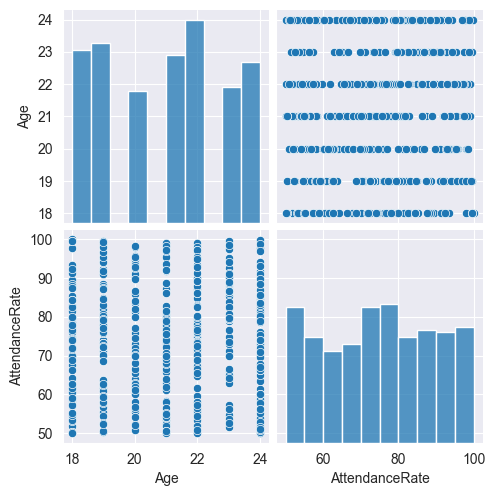

In [16]:
sns.pairplot(data[['Age', 'AttendanceRate']])

<Axes: xlabel='Age', ylabel='count'>

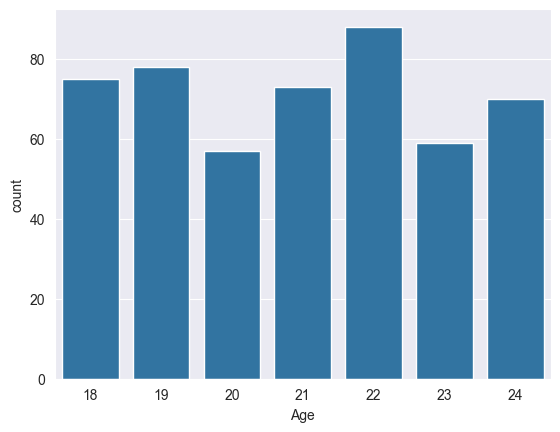

In [18]:
sns.countplot(data=data, x='Age')